<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_3/blob/main/Proyecto_18_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Reto Entrega 2**

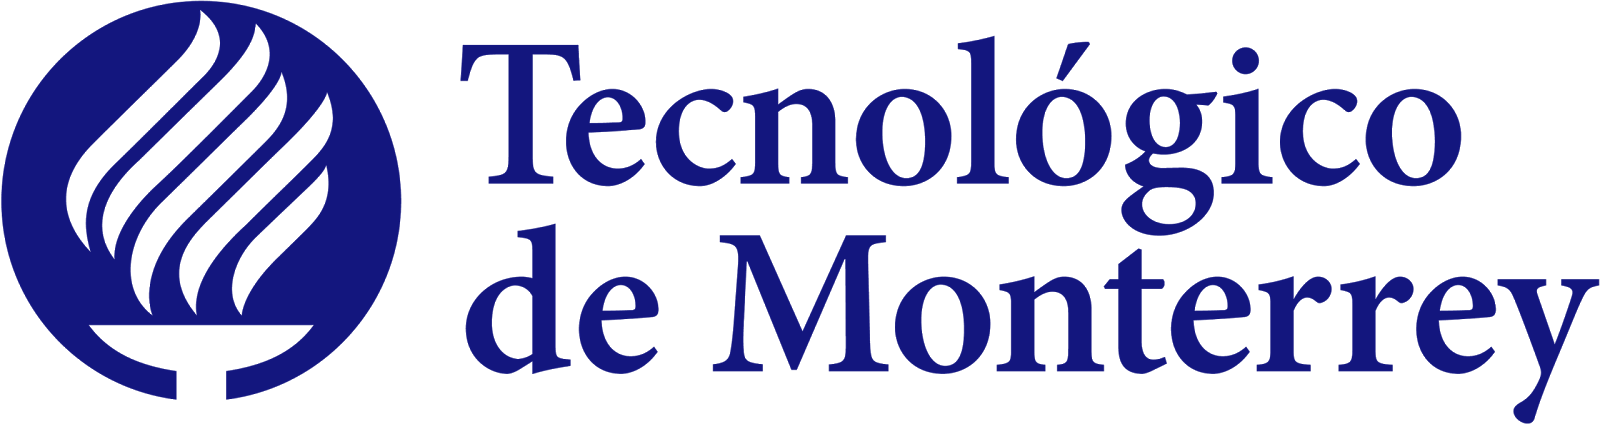

*   **Alumnos:** Julio Osvaldo Hernández Bucio y Juan Antonio Melendres Villa
*   **Matrícula:** A017944366 y A00369017
*   **Equipo:** 3
*   **Materia:** Ciencia y analítica de datos (Gpo 10)
*   **Profesor:** María de la Paz Rico Fernández.
*   **Fecha:** 18 de Noviembre de 2022

**Importamos librerias e instalamos paquetes**

In [1]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=35d748d6e1474859bc4cd42d32bb23ba31cebf78ac9978f2dbf1c2c3fa8fa1f0
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [2]:
!pip install missingpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 2.0 MB/s 


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

from shapely.geometry import Point

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import sys
from sklearn import tree

from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
import math

In [4]:
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

from missingpy import MissForest

# Limpieza de base de datos.

**Importamos la base de datos a utilizar**

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_3/main/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv', encoding='latin1')
df.sample(10)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
13,DLBAJ124,MANANTIAL CADUAÑO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,SAN JOSE DEL CABO,LOTICO (HUMEDAL),CANAL,-109.77912,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,ND,SI,LOTICO
3676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3276,OCPSU4852M1,RIO VERDE 2 CHARCO REDONDO,PACIFICO SUR,OAXACA,VILLA DE TUTUTEPEC,RIO VERDE,RIO VERDE,LOTICO,RIO,-97.75103,...,"SST,",SI,SI,NO,SI,SI,ND,SI,SI,LOTICO
2297,OCGCE5527,RIO EL CEPILLO,GOLFO CENTRO,VERACRUZ DE IGNACIO DE LA LLAVE,GUTIERREZ ZAMORA,RIo Tecolutla,RIO EL CEPILLO,LOTICO,RIO,-97.12712,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,SI,SI,LOTICO
1286,DLQUI2174,MANGLARES DE NICHUPTE 2,PENINSULA DE YUCATAN,QUINTANA ROO,BENITO JUAREZ,YUCATAN (RESTO DE RH 32),CUERPO DE AGUA DEL HUMEDAL,COSTERO (HUMEDAL),MANGLAR,-86.81740,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
315,DLDUR740,PRESA PRESIDENTE GPE VICTORIA 1,PACIFICO NORTE,DURANGO,DURANGO,RIO EL TUNAL,PRESA PRESIDENTE GUADALUPE VICTORIA,LENTICO,PRESA,-104.76603,...,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LENTICO
859,DLMIC1601,LA ESTANZUELA,LERMA SANTIAGO PACIFICO,MICHOACAN DE OCAMPO,IXTLAN,RIO LERMA 7,RIO DUERO,LOTICO,RIO,-102.37227,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,SI,SI,LOTICO
2374,OCGNO3558,PRESA VICENTE GUERRERO (SAUCES 3),GOLFO NORTE,TAMAULIPAS,PADILLA,AREA NO AFORADA,PRESA VICENTE GUERRERO,LENTICO (HUMEDAL),PRESA,-98.72422,...,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LENTICO
1789,OCFSU2910,PTAR CHIAPA DE CORZO 100 M a.a. DESCARGA,FRONTERA SUR,CHIAPAS,CHIAPA DE CORZO,PRESA CHICOASEN,RIO GRIJALVA,LOTICO,RIO,-93.02746,...,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LOTICO
2115,OCGCE3275,LA RESERVA,GOLFO CENTRO,VERACRUZ DE IGNACIO DE LA LLAVE,EMILIANO ZAPATA,RIO ACTOPAN,ARROYO INNOMINADO,LOTICO,ARROYO,-96.87251,...,"DQO,CF,E_COLI,OD%L,",SI,NO,SI,NO,NO,ND,NO,SI,LOTICO


Creamos un array de index

In [6]:
index = np.arange(1, 4142, 1)

Podemos eliminar la columna clave y remplazarla con el ID de cada fila

In [7]:
# Find the name of the column by index
n = df.columns[0]

# Drop that column
df.drop(n, axis = 1, inplace = True)

# Put whatever series you want in its place
df[n] = index

Podemos inferir el estado con el dato del municipio en el que se encuentra, eliminamos la columna estado

In [8]:
df = df.drop('ESTADO', axis = 1, inplace = False)

In [9]:
df.head(25)

,SITIO,ORGANISMO_DE_CUENCA,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,CLAVE
0,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,...,SI,NO,SI,NO,SI,ND,SI,SI,LENTICO,1
1,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,2
2,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,3
3,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,4
4,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,5
5,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,22.88000,2020.0,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,6
6,LOS CABOS 2,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90540,22.88310,2020.0,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,7
7,LAGUNA TODOS SANTOS - CENTRO DE LA LAGUNA,PENINSULA DE BAJA CALIFORNIA,LA PAZ,TODOS SANTOS,TODOS SANTOS,COSTERO,LAGUNA,-110.23902,23.43930,2020.0,...,ND,ND,SI,ND,ND,NO,NO,SI,COSTERO,8
8,MANANTIAL SAN REGIS,PENINSULA DE BAJA CALIFORNIA,LA PAZ,TODOS SANTOS,TODOS SANTOS,LOTICO,ARROYO,-110.22379,23.45805,2020.0,...,SI,SI,SI,NO,SI,ND,SI,SI,LOTICO,9
9,AGUA CALIENTE II,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SANTIAGO,SANTIAGO,LOTICO,ARROYO,-109.80786,23.43995,2020.0,...,SI,SI,SI,SI,SI,ND,NO,SI,LOTICO,10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SITIO                   3493 non-null   object 
 1   ORGANISMO_DE_CUENCA     3493 non-null   object 
 2   MUNICIPIO               3493 non-null   object 
 3   CUENCA                  3492 non-null   object 
 4   CUERPO DE AGUA          3479 non-null   object 
 5   TIPO                    3493 non-null   object 
 6   SUBTIPO                 3479 non-null   object 
 7   LONGITUD                3493 non-null   float64
 8   LATITUD                 3493 non-null   float64
 9   PERIODO                 3493 non-null   float64
 10  DBO_mg/L                2581 non-null   object 
 11  CALIDAD_DBO             2581 non-null   object 
 12  DQO_mg/L                2581 non-null   object 
 13  CALIDAD_DQO             2581 non-null   object 
 14  SST_mg/L                3489 non-null   

Se puede observar que algunos datos que deberian ser tomados como numericos estan siendo almacenados como object

In [11]:
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

In [12]:
posibleNumericColumns = []

for colname, coltype in df.dtypes.to_dict().items():
    if coltype ==  'object' : 
      for value in df[colname].values:
        if(has_numbers(str(value))):
          posibleNumericColumns.append(colname)
          break

Verificando los datos podemos observar que las siguientes columnas si pueden ser de tipo object (string), por lo que se remueven de nuestra lista floats

In [13]:
posibleNumericColumns.remove('SITIO')
posibleNumericColumns.remove('CUENCA')
posibleNumericColumns.remove('CUERPO DE AGUA')
posibleNumericColumns.remove('TIPO')

Despues de haber analizado columnas numericas eliminaremos las columnas que tienen todos los valores nulos con base en lo observado en df.info()

In [14]:
df = df.drop('TOX_D_48_FON_UT', axis = 1, inplace = False)
df = df.drop('CALIDAD_TOX_D_48_FON', axis = 1, inplace = False)
df = df.drop('TOX_FIS_FON_15_UT', axis = 1, inplace = False)
df = df.drop('CALIDAD_TOX_FIS_FON_15', axis = 1, inplace = False)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SITIO                   3493 non-null   object 
 1   ORGANISMO_DE_CUENCA     3493 non-null   object 
 2   MUNICIPIO               3493 non-null   object 
 3   CUENCA                  3492 non-null   object 
 4   CUERPO DE AGUA          3479 non-null   object 
 5   TIPO                    3493 non-null   object 
 6   SUBTIPO                 3479 non-null   object 
 7   LONGITUD                3493 non-null   float64
 8   LATITUD                 3493 non-null   float64
 9   PERIODO                 3493 non-null   float64
 10  DBO_mg/L                2581 non-null   object 
 11  CALIDAD_DBO             2581 non-null   object 
 12  DQO_mg/L                2581 non-null   object 
 13  CALIDAD_DQO             2581 non-null   object 
 14  SST_mg/L                3489 non-null   

Remplazamos valores de SI o NO con 1 y 0

In [16]:
df['CUMPLE_CON_DBO'] = df['CUMPLE_CON_DBO'].replace('SI',int(1))
df['CUMPLE_CON_DBO'] = df['CUMPLE_CON_DBO'].replace('NO',int(0))
df['CUMPLE_CON_DBO'] = df['CUMPLE_CON_DBO'].replace('ND',np.NaN)

In [17]:
df['CUMPLE_CON_DQO'] = df['CUMPLE_CON_DQO'].replace('SI',int(1))
df['CUMPLE_CON_DQO'] = df['CUMPLE_CON_DQO'].replace('NO',int(0))
df['CUMPLE_CON_DQO'] = df['CUMPLE_CON_DQO'].replace('ND',np.NaN)

In [18]:
df['CUMPLE_CON_SST'] = df['CUMPLE_CON_SST'].replace('SI',int(1))
df['CUMPLE_CON_SST'] = df['CUMPLE_CON_SST'].replace('NO',int(0))
df['CUMPLE_CON_SST'] = df['CUMPLE_CON_SST'].replace('ND',np.NaN)

In [19]:
df['CUMPLE_CON_CF'] = df['CUMPLE_CON_CF'].replace('SI',int(1))
df['CUMPLE_CON_CF'] = df['CUMPLE_CON_CF'].replace('NO',int(0))
df['CUMPLE_CON_CF'] = df['CUMPLE_CON_CF'].replace('ND',np.NaN)

In [20]:
df['CUMPLE_CON_E_COLI'] = df['CUMPLE_CON_E_COLI'].replace('SI',int(1))
df['CUMPLE_CON_E_COLI'] = df['CUMPLE_CON_E_COLI'].replace('NO',int(0))
df['CUMPLE_CON_E_COLI'] = df['CUMPLE_CON_E_COLI'].replace('ND',np.NaN)

In [21]:
df['CUMPLE_CON_ENTEROC'] = df['CUMPLE_CON_ENTEROC'].replace('SI',int(1))
df['CUMPLE_CON_ENTEROC'] = df['CUMPLE_CON_ENTEROC'].replace('NO',int(0))
df['CUMPLE_CON_ENTEROC'] = df['CUMPLE_CON_ENTEROC'].replace('ND',np.NaN)

In [22]:
df['CUMPLE_CON_OD'] = df['CUMPLE_CON_OD'].replace('SI',int(1))
df['CUMPLE_CON_OD'] = df['CUMPLE_CON_OD'].replace('NO',int(0))
df['CUMPLE_CON_OD'] = df['CUMPLE_CON_OD'].replace('ND',np.NaN)

In [23]:
df['CUMPLE_CON_TOX'] = df['CUMPLE_CON_TOX'].replace('SI',int(1))
df['CUMPLE_CON_TOX'] = df['CUMPLE_CON_TOX'].replace('NO',int(0))
df['CUMPLE_CON_TOX'] = df['CUMPLE_CON_TOX'].replace('ND',np.NaN)

Se puede observar que los ultimas registros vienen vacios

In [24]:
df.tail(100)

,SITIO,ORGANISMO_DE_CUENCA,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,CLAVE
4041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4042
4042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4043
4043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4044
4044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4045
4045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4137
4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4138
4138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4139
4139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140


Buscamos el indice del ultimo registro que tiene informacion

In [25]:
indexRow = df.index[df['SITIO'] == 'RIO BRAVO 8 (PASO DE LOS INDIOS)']
indexRow

Int64Index([3492], dtype='int64')

In [26]:
df.loc[3492:].isnull().sum()

SITIO                     648
ORGANISMO_DE_CUENCA       648
MUNICIPIO                 648
CUENCA                    648
CUERPO DE AGUA            648
TIPO                      648
SUBTIPO                   648
LONGITUD                  648
LATITUD                   648
PERIODO                   648
DBO_mg/L                  648
CALIDAD_DBO               648
DQO_mg/L                  648
CALIDAD_DQO               648
SST_mg/L                  648
CALIDAD_SST               648
COLI_FEC_NMP_100mL        648
CALIDAD_COLI_FEC          648
E_COLI_NMP_100mL          648
CALIDAD_E_COLI            648
ENTEROC_NMP_100mL         649
CALIDAD_ENTEROC           649
OD_PORC                   648
CALIDAD_OD_PORC           648
OD_PORC_SUP               649
CALIDAD_OD_PORC_SUP       649
OD_PORC_MED               649
CALIDAD_OD_PORC_MED       649
OD_PORC_FON               649
CALIDAD_OD_PORC_FON       649
TOX_D_48_UT               648
CALIDAD_TOX_D_48          648
TOX_V_15_UT               648
CALIDAD_TO

In [27]:
4141 - 649

3492

Obtenemos el dataframe sin los registros nulos

In [28]:
df = df.drop(df.index[3493:])

In [29]:
df.shape

(3493, 50)

Empezamos la conversion de las columnas objeto que deberian ser float con una converstion tipo string, dado el problema del digito '<'

In [30]:
df[posibleNumericColumns] = df[posibleNumericColumns].astype(str)

In [31]:
df.iloc[:, 12:]

,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,...,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,CLAVE
0,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,nan,NaN,...,1.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,LENTICO,1
1,nan,NaN,<10,Excelente,nan,NaN,nan,NaN,20,Excelente,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,COSTERO,2
2,nan,NaN,<10,Excelente,nan,NaN,nan,NaN,<3,Excelente,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,COSTERO,3
3,nan,NaN,13.9667,Excelente,nan,NaN,nan,NaN,<3,Excelente,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,COSTERO,4
4,nan,NaN,<10,Excelente,nan,NaN,nan,NaN,30,Excelente,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,COSTERO,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,<10,Excelente,122,Aceptable,2400,Contaminada,2400,Fuertemente contaminada,nan,NaN,...,1.0,1.0,1.0,0.0,0.0,NaN,1.0,1.0,LOTICO,3489
3489,115.88,Contaminada,54,Buena calidad,2400,Contaminada,4,Excelente,nan,NaN,...,0.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,LENTICO,3490
3490,87.64,Contaminada,70,Buena calidad,240,Aceptable,15,Excelente,nan,NaN,...,1.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,LOTICO,3491
3491,35.92,Aceptable,56,Buena calidad,2400,Contaminada,11,Excelente,nan,NaN,...,1.0,1.0,1.0,0.0,1.0,NaN,1.0,1.0,LOTICO,3492


Creamos una nueva columna con el sufijo Min, esta nueva columna nos indicara si cada valor en las columnas numericas del registro contenia la etiqueta de <  

In [32]:
newNumericColumns = []

In [33]:
for idx, column in enumerate(posibleNumericColumns):

  strNumericColumn = posibleNumericColumns[idx] + 'Min'

  newNumericColumns.append(strNumericColumn)

  df.insert(df.columns.get_loc(posibleNumericColumns[idx]) + 1, strNumericColumn, "")

  df[strNumericColumn] = df[posibleNumericColumns[idx]].str.contains('<')

In [34]:
newNumericColumns

['DBO_mg/LMin',
 'DQO_mg/LMin',
 'SST_mg/LMin',
 'COLI_FEC_NMP_100mLMin',
 'E_COLI_NMP_100mLMin',
 'ENTEROC_NMP_100mLMin',
 'OD_PORCMin',
 'OD_PORC_SUPMin',
 'OD_PORC_MEDMin',
 'OD_PORC_FONMin',
 'TOX_D_48_UTMin',
 'TOX_V_15_UTMin',
 'TOX_D_48_SUP_UTMin',
 'TOX_FIS_SUP_15_UTMin']

Convertimos los valores booelanos de las nuevas columnas Min, 1 para indicar que tenia la etiqueta de '<' y 0 para indicar que es un valor mayor que la metrica 

In [35]:
for column in newNumericColumns:
  df[column] = df[column].astype(int)

Remplazamos los valores que tengan el caracter '<' con el siguiente menor numero en su etiqueta 

In [36]:
for column in posibleNumericColumns:
  
  for index, row in df.iterrows():

    if('<' in row[column]):
      number = row[column].split('<',1)[1]
      numberInt = (pd.to_numeric(number)) - 1
      df.loc[index, column] = str(numberInt)

In [37]:
for column in posibleNumericColumns:
  
  for index, row in df.iterrows():

    if('nan' in str(row[column])):
      df.loc[index, column] = np.nan

Ahora podemos convertir de Object(string) a un valor numerico las columnas para nuestros calculos estadisticos

In [38]:
for column in posibleNumericColumns:

  df[column] = pd.to_numeric(df[column])

In [39]:
df.iloc[:20, :20]

,SITIO,ORGANISMO_DE_CUENCA,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,DBO_mg/LMin,CALIDAD_DBO,DQO_mg/L,DQO_mg/LMin,CALIDAD_DQO,SST_mg/L,SST_mg/LMin,CALIDAD_SST,COLI_FEC_NMP_100mL
0,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6.00,0,Buena calidad,54.08,0,Contaminada,13.7500,0,Excelente,1162.0
1,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,NaN,0,NaN,NaN,0,NaN,9.0000,1,Excelente,NaN
2,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,NaN,0,NaN,NaN,0,NaN,9.0000,1,Excelente,NaN
3,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,NaN,0,NaN,NaN,0,NaN,13.9667,0,Excelente,NaN
4,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,NaN,0,NaN,NaN,0,NaN,9.0000,1,Excelente,NaN
5,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,22.88000,2020.0,NaN,0,NaN,NaN,0,NaN,22.0667,0,Excelente,NaN
6,LOS CABOS 2,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90540,22.88310,2020.0,NaN,0,NaN,NaN,0,NaN,13.9667,0,Excelente,NaN
7,LAGUNA TODOS SANTOS - CENTRO DE LA LAGUNA,PENINSULA DE BAJA CALIFORNIA,LA PAZ,TODOS SANTOS,TODOS SANTOS,COSTERO,LAGUNA,-110.23902,23.43930,2020.0,NaN,0,NaN,NaN,0,NaN,57.8500,0,Buena calidad,NaN
8,MANANTIAL SAN REGIS,PENINSULA DE BAJA CALIFORNIA,LA PAZ,TODOS SANTOS,TODOS SANTOS,LOTICO,ARROYO,-110.22379,23.45805,2020.0,1.00,1,Excelente,9.00,1,Excelente,33.9000,0,Buena calidad,3873.0
9,AGUA CALIENTE II,PENINSULA DE BAJA CALIFORNIA,LOS CABOS,SANTIAGO,SANTIAGO,LOTICO,ARROYO,-109.80786,23.43995,2020.0,1.00,1,Excelente,9.00,1,Excelente,25.6000,0,Buena calidad,189.0


In [40]:
df.iloc[:20, 20:40]

,COLI_FEC_NMP_100mLMin,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,E_COLI_NMP_100mLMin,CALIDAD_E_COLI,ENTEROC_NMP_100mL,ENTEROC_NMP_100mLMin,CALIDAD_ENTEROC,OD_PORC,OD_PORCMin,CALIDAD_OD_PORC,OD_PORC_SUP,OD_PORC_SUPMin,CALIDAD_OD_PORC_SUP,OD_PORC_MED,OD_PORC_MEDMin,CALIDAD_OD_PORC_MED,OD_PORC_FON,OD_PORC_FONMin,CALIDAD_OD_PORC_FON
0,0,Contaminada,98.0,0,Excelente,NaN,0,NaN,NaN,0,NaN,46.8,0,Aceptable,NaN,0,NaN,NaN,0,NaN
1,0,NaN,NaN,0,NaN,20.0,0,Excelente,NaN,0,NaN,92.0,0,Excelente,95.4,0,Excelente,92.2,0,Excelente
2,0,NaN,NaN,0,NaN,2.0,1,Excelente,NaN,0,NaN,92.0,0,Excelente,95.4,0,Excelente,92.2,0,Excelente
3,0,NaN,NaN,0,NaN,2.0,1,Excelente,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,86.7,0,Excelente
4,0,NaN,NaN,0,NaN,30.0,0,Excelente,NaN,0,NaN,96.2,0,Excelente,95.9,0,Excelente,95.5,0,Excelente
5,0,NaN,NaN,0,NaN,2.0,1,Excelente,NaN,0,NaN,90.1,0,Excelente,95.2,0,Excelente,94.2,0,Excelente
6,0,NaN,NaN,0,NaN,90.0,0,Excelente,NaN,0,NaN,81.9,0,Excelente,82.4,0,Excelente,79.2,0,Excelente
7,0,NaN,NaN,0,NaN,402.0,0,Contaminada,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,146.0,0,Contaminada
8,0,Contaminada,512.0,0,Buena calidad,NaN,0,NaN,83.6,0,Excelente,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
9,0,Buena calidad,2.0,1,Excelente,NaN,0,NaN,137.0,0,Contaminada,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN


In [41]:
df.iloc[:20, 40:60]

,TOX_D_48_UT,TOX_D_48_UTMin,CALIDAD_TOX_D_48,TOX_V_15_UT,TOX_V_15_UTMin,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,TOX_D_48_SUP_UTMin,CALIDAD TOX_D_48_SUP,TOX_FIS_SUP_15_UT,TOX_FIS_SUP_15_UTMin,CALIDAD_TOX_FIS_SUP_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC
0,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,0.0,1,No Toxico,Rojo,"DQO,CF,",1.0,0.0,1.0,0.0,1.0,NaN
1,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,Verde,NaN,NaN,NaN,1.0,NaN,NaN,1.0
2,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,Verde,NaN,NaN,NaN,1.0,NaN,NaN,1.0
3,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,Verde,NaN,NaN,NaN,1.0,NaN,NaN,1.0
4,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,Verde,NaN,NaN,NaN,1.0,NaN,NaN,1.0
5,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,Verde,NaN,NaN,NaN,1.0,NaN,NaN,1.0
6,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,Verde,NaN,NaN,NaN,1.0,NaN,NaN,1.0
7,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0.0,1,No Toxico,Rojo,"ENT_FEC,OD%F,",NaN,NaN,1.0,NaN,NaN,0.0
8,0.0,1,No Toxico,0.0,1,No Toxico,NaN,0,NaN,NaN,0,NaN,Amarillo,"CF,",1.0,1.0,1.0,0.0,1.0,NaN
9,0.0,1,No Toxico,0.0,1,No Toxico,NaN,0,NaN,NaN,0,NaN,Amarillo,"OD%L,",1.0,1.0,1.0,1.0,1.0,NaN


# Clasificacion

**Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]**

En esta sección de código, comenzamos asignando un valor numérico a las variables de salida. En este caso fueron: verde = 2, rojo = 1, amarillo = 0

In [42]:
lbe = LabelEncoder()
df["SEMAFORO_Type"] = lbe.fit_transform(df["SEMAFORO"])
df["SEMAFORO_Type"].unique()

array([1, 2, 0])

Comprobación de los nombres numéricos de las variables de salida

In [43]:
df[['SEMAFORO','SEMAFORO_Type']]

,SEMAFORO,SEMAFORO_Type
0,Rojo,1
1,Verde,2
2,Verde,2
3,Verde,2
4,Verde,2
...,...,...
3488,Amarillo,0
3489,Rojo,1
3490,Rojo,1
3491,Amarillo,0


Tomaremos las variables numericas como las variables independientes ademas de su etiquetado como minima o maxima

In [44]:
newNumericColumns = []

for column in posibleNumericColumns:

  newNumericColumns.append(column)
  newNumericColumns.append(column + 'Min')

In [45]:
df[newNumericColumns].head(25)

,DBO_mg/L,DBO_mg/LMin,DQO_mg/L,DQO_mg/LMin,SST_mg/L,SST_mg/LMin,COLI_FEC_NMP_100mL,COLI_FEC_NMP_100mLMin,E_COLI_NMP_100mL,E_COLI_NMP_100mLMin,...,OD_PORC_FON,OD_PORC_FONMin,TOX_D_48_UT,TOX_D_48_UTMin,TOX_V_15_UT,TOX_V_15_UTMin,TOX_D_48_SUP_UT,TOX_D_48_SUP_UTMin,TOX_FIS_SUP_15_UT,TOX_FIS_SUP_15_UTMin
0,6.00,0,54.08,0,13.7500,0,1162.0,0,98.0,0,...,NaN,0,NaN,0,NaN,0,0.0,1,0.0,1
1,NaN,0,NaN,0,9.0000,1,NaN,0,NaN,0,...,92.2,0,NaN,0,NaN,0,NaN,0,0.0,1
2,NaN,0,NaN,0,9.0000,1,NaN,0,NaN,0,...,92.2,0,NaN,0,NaN,0,NaN,0,0.0,1
3,NaN,0,NaN,0,13.9667,0,NaN,0,NaN,0,...,86.7,0,NaN,0,NaN,0,NaN,0,0.0,1
4,NaN,0,NaN,0,9.0000,1,NaN,0,NaN,0,...,95.5,0,NaN,0,NaN,0,NaN,0,0.0,1
5,NaN,0,NaN,0,22.0667,0,NaN,0,NaN,0,...,94.2,0,NaN,0,NaN,0,NaN,0,0.0,1
6,NaN,0,NaN,0,13.9667,0,NaN,0,NaN,0,...,79.2,0,NaN,0,NaN,0,NaN,0,0.0,1
7,NaN,0,NaN,0,57.8500,0,NaN,0,NaN,0,...,146.0,0,NaN,0,NaN,0,NaN,0,0.0,1
8,1.00,1,9.00,1,33.9000,0,3873.0,0,512.0,0,...,NaN,0,0.0,1,0.0,1,NaN,0,NaN,0
9,1.00,1,9.00,1,25.6000,0,189.0,0,2.0,1,...,NaN,0,0.0,1,0.0,1,NaN,0,NaN,0


Podemos observar que existen muchos registros con valores NAN por lo que procederemos a imputar las variables independientes con **MissForest**

MissForest es un algoritmo de imputación de datos basado en el aprendizaje automático que funciona con el algoritmo Random Forest.

In [46]:
imputer = MissForest(max_iter=12, n_jobs=-1)
X_imputed = imputer.fit_transform(df[newNumericColumns])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 1


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 2


Agregamos los valores imputados al dataset con la etiqueta **MF_**

In [47]:
mfColumns = []
index = 0

for column in newNumericColumns:
  mfColumns.append(column)
  strNew = 'MF_'+column
  mfColumns.append(strNew)
  df[strNew] = X_imputed[:,index]
  index+=1

Comparamos nuestros valores imputados y valores originales

In [48]:
comparison_df = df[mfColumns]

comparison_df

,DBO_mg/L,MF_DBO_mg/L,DBO_mg/LMin,MF_DBO_mg/LMin,DQO_mg/L,MF_DQO_mg/L,DQO_mg/LMin,MF_DQO_mg/LMin,SST_mg/L,MF_SST_mg/L,...,TOX_V_15_UTMin,MF_TOX_V_15_UTMin,TOX_D_48_SUP_UT,MF_TOX_D_48_SUP_UT,TOX_D_48_SUP_UTMin,MF_TOX_D_48_SUP_UTMin,TOX_FIS_SUP_15_UT,MF_TOX_FIS_SUP_15_UT,TOX_FIS_SUP_15_UTMin,MF_TOX_FIS_SUP_15_UTMin
0,6.00,6.0000,0,0.0,54.08,54.0800,0,0.0,13.7500,13.7500,...,0,0.0,0.0,0.0000,1,1.0,0.0,0.0000,1,1.0
1,NaN,14.4139,0,0.0,NaN,121.1900,0,0.0,9.0000,9.0000,...,0,0.0,NaN,1.1975,0,0.0,0.0,0.0000,1,1.0
2,NaN,14.4139,0,0.0,NaN,121.1900,0,0.0,9.0000,9.0000,...,0,0.0,NaN,1.1975,0,0.0,0.0,0.0000,1,1.0
3,NaN,13.6142,0,0.0,NaN,118.0634,0,0.0,13.9667,13.9667,...,0,0.0,NaN,1.2029,0,0.0,0.0,0.0000,1,1.0
4,NaN,14.9809,0,0.0,NaN,119.0818,0,0.0,9.0000,9.0000,...,0,0.0,NaN,1.1975,0,0.0,0.0,0.0000,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,1.00,1.0000,1,1.0,9.00,9.0000,1,1.0,122.0000,122.0000,...,1,1.0,NaN,11.6671,0,0.0,NaN,2.4982,0,0.0
3489,39.09,39.0900,0,0.0,115.88,115.8800,0,0.0,54.0000,54.0000,...,0,0.0,0.0,0.0000,1,1.0,0.0,0.0000,1,1.0
3490,4.40,4.4000,0,0.0,87.64,87.6400,0,0.0,70.0000,70.0000,...,1,1.0,NaN,9.3592,0,0.0,NaN,4.2690,0,0.0
3491,1.00,1.0000,1,1.0,35.92,35.9200,0,0.0,56.0000,56.0000,...,1,1.0,NaN,11.4540,0,0.0,NaN,4.0410,0,0.0


# Selecciona tus variables independientes X y dependiente Y (semáforo)

In [49]:
X = X_imputed
y = df['SEMAFORO_Type']

# Realiza tu clasificador

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [51]:
# Creating the classifier object
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=5, min_samples_leaf=5)
  
    # Performing training
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [52]:
SemaforosNames = df["SEMAFORO"].unique()
SemaforosNames

array(['Rojo', 'Verde', 'Amarillo'], dtype=object)

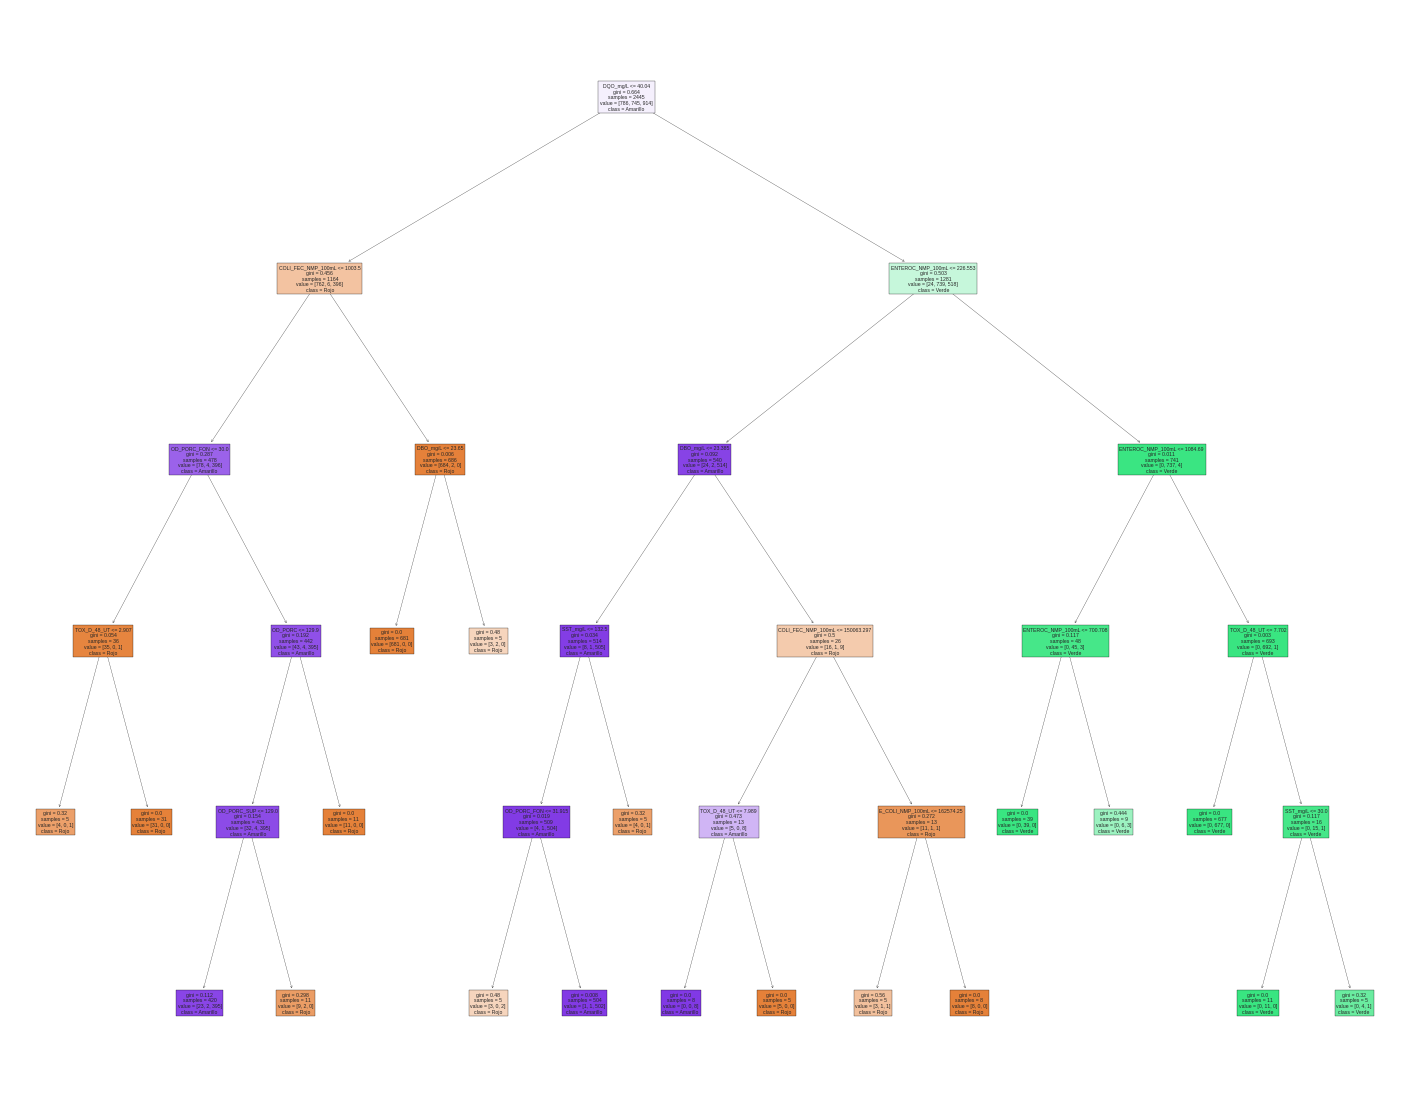

In [53]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_gini, 
                   feature_names=newNumericColumns,  
                   class_names=SemaforosNames,
                   filled=True)

# Realiza un análisis general de las features importances a traves de decision trees o random forest. Selecciona las variables de mayor importancia.

In [54]:
importances = clf_gini.feature_importances_

In [55]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

[13 25 24 23 22 21 19 17 16 15 26 27  9  7  5  3  1 11  8  4 20 14 12  0
 18  6  2 10]


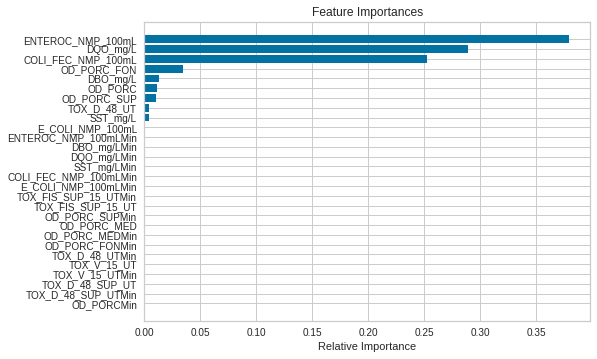

In [56]:
forest_importances = pd.Series(importances, index=feature_names)
indices = np.argsort(importances)

print(indices)


plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [newNumericColumns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [57]:
for name, importance in zip(df[newNumericColumns], clf_gini.feature_importances_):
  print(name, "=", importance)

DBO_mg/L = 0.013232391302565894
DBO_mg/LMin = 0.0
DQO_mg/L = 0.2888243827083973
DQO_mg/LMin = 0.0
SST_mg/L = 0.004169062045636203
SST_mg/LMin = 0.0
COLI_FEC_NMP_100mL = 0.25281776699123965
COLI_FEC_NMP_100mLMin = 0.0
E_COLI_NMP_100mL = 0.00047558618535042637
E_COLI_NMP_100mLMin = 0.0
ENTEROC_NMP_100mL = 0.37938794667622205
ENTEROC_NMP_100mLMin = 0.0
OD_PORC = 0.011722994735969642
OD_PORCMin = 0.0
OD_PORC_SUP = 0.010345882349617582
OD_PORC_SUPMin = 0.0
OD_PORC_MED = 0.0
OD_PORC_MEDMin = 0.0
OD_PORC_FON = 0.03476029444551534
OD_PORC_FONMin = 0.0
TOX_D_48_UT = 0.004263692559485836
TOX_D_48_UTMin = 0.0
TOX_V_15_UT = 0.0
TOX_V_15_UTMin = 0.0
TOX_D_48_SUP_UT = 0.0
TOX_D_48_SUP_UTMin = 0.0
TOX_FIS_SUP_15_UT = 0.0
TOX_FIS_SUP_15_UTMin = 0.0


In [58]:
print("Datos de entrenamiento: ", round((X_train.shape[0]/X.shape[0])*100,2),"%\t", y_train.shape[0])
print("Datos de prueba: \t", round((X_test.shape[0]/X.shape[0])*100,2),"%\t", y_test.shape[0])

Datos de entrenamiento:  70.0 %	 2445
Datos de prueba: 	 30.0 %	 1048


In [59]:
log_clf = LogisticRegression(random_state = 42, max_iter = 10000)
rnd_clf = RandomForestClassifier(random_state = 42)
svm_clf = SVC(probability = True, random_state = 42)

In [60]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting = 'soft')

In [61]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [62]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7309160305343512
RandomForestClassifier 0.982824427480916
SVC 0.5152671755725191
VotingClassifier 0.9446564885496184


Podemos concluir que con base en ClasificationForest nuestras variables de mayor importancia son:



*   ENTEROC_NMP_100mL
*   DQO_mg/L
*   COLI_FEC_NMP_100mL

# Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.

In [66]:
y_pred_en = clf_gini.predict(X_test)
y_pred_en

array([0, 0, 1, ..., 2, 1, 0])

In [67]:
print(classification_report(y_test, y_pred_en, labels=[1, 2, 0]))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       346
           2       0.99      0.99      0.99       353
           0       0.99      0.99      0.99       349

    accuracy                           0.99      1048
   macro avg       0.99      0.99      0.99      1048
weighted avg       0.99      0.99      0.99      1048



# Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

Una matriz de confusión es una técnica para resumir el rendimiento de un algoritmo de clasificación. La precisión de la clasificación por sí sola puede ser engañosa si tiene un número desigual de observaciones en cada clase o si tiene más de dos clases en su conjunto de datos. Calcular una matriz de confusión puede darle una mejor idea de qué está haciendo bien su modelo de clasificación y qué tipos de errores está cometiendo.

In [68]:
cm = confusion_matrix(y_test, y_pred_en)
accuracy = sum(cm[i][i] for i in range(3)) / y_test.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.9904580152671756


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


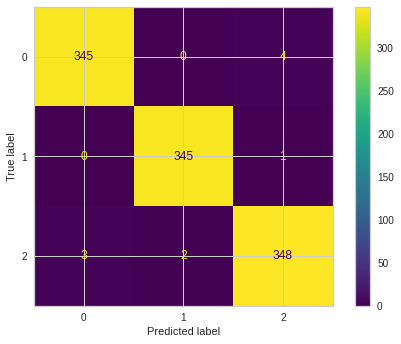

In [69]:
plot_confusion_matrix(clf_gini, X_test, y_test)  

plt.show()